In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit, differential_evolution
import csv
from data_read import data_read
from rebinning import rebinning
from fit import fit
from get_rates import get_rates
from get_bkg import get_bkg

In [2]:
R = 57.1
d = np.array([200,
250,
300,
350,
400,
450,
500,
600,
700,
800,
900,
1000,
1100,
1200,
1300,
1400])

In [3]:
#Test para ver si la distribución radial es la correcta
B = 10000

thetas = np.zeros(B)
phis = np.zeros(B)
xs = np.zeros(B)
ys = np.zeros(B)
zs = np.zeros(B)

for i in range(B):
    theta = 2*np.pi*np.random.uniform()
    phi = np.arccos(1 - 2*np.random.uniform())
    x = np.sin(phi) * np.cos(theta)
    y = np.sin(phi) * np.sin(theta)
    z = np.cos(phi)
    
    thetas[i] = theta
    phis[i] = phi
    xs[i] = x
    ys[i] = y
    zs[i] = z



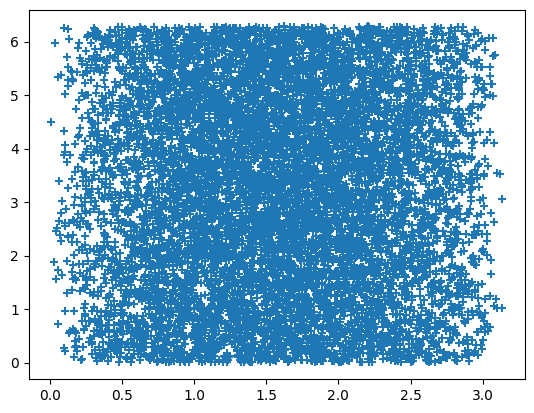

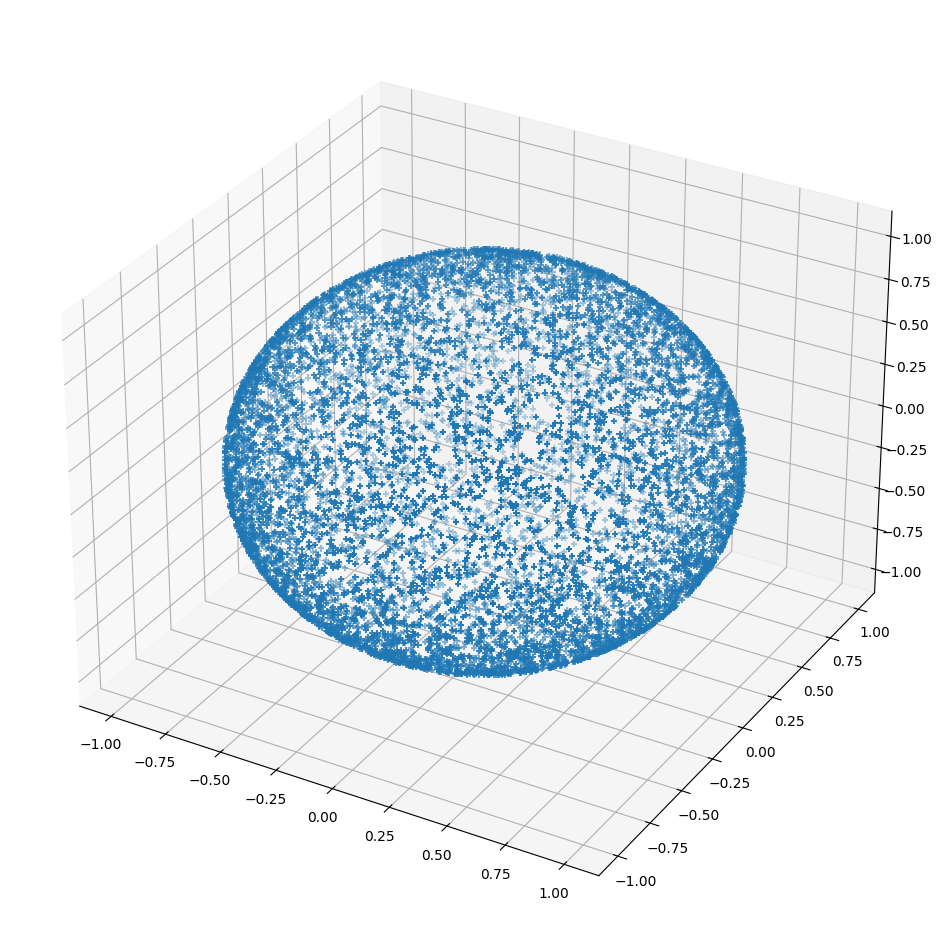

In [4]:
plt.scatter(phis,thetas,marker='+')
plt.show()
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(xs,ys,zs,marker='+')
plt.show()

In [5]:
geometric_efficiencies = np.zeros(len(d))
for j in range(len(d)):
    B = 100000
    cnt = 0
    for i in range(B):
        theta = 2*np.pi*np.random.uniform()
        phi = np.arccos(1 - 2*np.random.uniform())
        x = np.sin(phi) * np.cos(theta)
        y = np.sin(phi) * np.sin(theta)
        z = np.cos(phi)
    
        pho = (d[j]/z)*np.sqrt(x**2+y**2)
    
        if 0<=pho and pho<R:
            cnt += 1
    eg = cnt/B
    geometric_efficiencies[j] = eg
    print('d = '+str(d[j])+' mm | eg = '+str(eg))


d = 200 mm | eg = 0.01937
d = 250 mm | eg = 0.01258
d = 300 mm | eg = 0.00858
d = 350 mm | eg = 0.00632
d = 400 mm | eg = 0.00482
d = 450 mm | eg = 0.004
d = 500 mm | eg = 0.00327
d = 600 mm | eg = 0.00219
d = 700 mm | eg = 0.00165
d = 800 mm | eg = 0.00135
d = 900 mm | eg = 0.00112
d = 1000 mm | eg = 0.00084
d = 1100 mm | eg = 0.00075
d = 1200 mm | eg = 0.00062
d = 1300 mm | eg = 0.00045
d = 1400 mm | eg = 0.00048


In [6]:
for i in geometric_efficiencies:
    print(i)

0.01937
0.01258
0.00858
0.00632
0.00482
0.004
0.00327
0.00219
0.00165
0.00135
0.00112
0.00084
0.00075
0.00062
0.00045
0.00048


In [7]:
geometric_efficiencies

array([0.01937, 0.01258, 0.00858, 0.00632, 0.00482, 0.004  , 0.00327,
       0.00219, 0.00165, 0.00135, 0.00112, 0.00084, 0.00075, 0.00062,
       0.00045, 0.00048])